In [3]:
# Data handling
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [4]:
# Load the German Credit data (must be in the same folder)
df = pd.read_csv('german_credit_data.csv')

# View first few rows
df.head()


,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [5]:
# Basic info about the data
df.info()

# Check for missing values
df.isnull().sum()

# Summary statistics
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
dtypes: int64(5), object(5)
memory usage: 78.3+ KB


,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [7]:
# Convert categorical columns to numerical (One-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)


In [9]:
print(df_encoded.columns)


Index(['Unnamed: 0', 'Age', 'Job', 'Credit amount', 'Duration', 'Sex_male',
       'Housing_own', 'Housing_rent', 'Saving accounts_moderate',
       'Saving accounts_quite rich', 'Saving accounts_rich',
       'Checking account_moderate', 'Checking account_rich', 'Purpose_car',
       'Purpose_domestic appliances', 'Purpose_education',
       'Purpose_furniture/equipment', 'Purpose_radio/TV', 'Purpose_repairs',
       'Purpose_vacation/others'],
      dtype='object')


In [12]:
print(df.columns)


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [14]:
print('Risk' in df.columns)  # Should return True


False


In [17]:
df_original = pd.read_csv('german_credit_data.csv')


In [19]:
print(df_original.columns)


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [20]:
import pandas as pd

# Reload the original dataset
df_original = pd.read_csv("german_credit_data.csv")

# Check its columns
print(df_original.columns)


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [21]:
print(repr(df_original.columns))


Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose'],
      dtype='object')


In [22]:
df_original.columns = df_original.columns.str.strip()


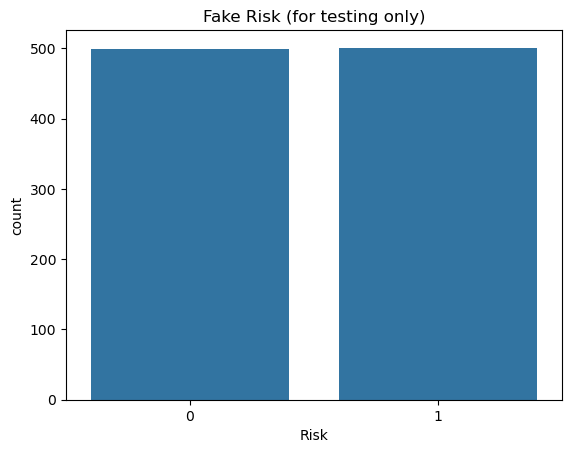

In [23]:
import numpy as np

# Add a dummy Risk column (random 1s and 0s)
df_original['Risk'] = np.random.choice([0, 1], size=len(df_original))

# Now plot and continue your ML pipeline
sns.countplot(x='Risk', data=df_original)
plt.title("Fake Risk (for testing only)")
plt.show()


In [24]:
# Drop rows with missing values (optional, depends on your dataset)
df = df_original.dropna()

# One-hot encode all categorical columns (automatically detects them)
df_encoded = pd.get_dummies(df, drop_first=True)


In [25]:
X = df_encoded.drop('Risk', axis=1)  # All features
y = df_encoded['Risk']               # Target


In [26]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [28]:
from sklearn.linear_model import LogisticRegression

# Initialize and train
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# Predict
y_pred_lr = lr_model.predict(X_test)


In [29]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))



Logistic Regression Accuracy: 0.5238095238095238
Confusion Matrix:
 [[22 25]
 [25 33]]
Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.47      0.47        47
           1       0.57      0.57      0.57        58

    accuracy                           0.52       105
   macro avg       0.52      0.52      0.52       105
weighted avg       0.52      0.52      0.52       105



In [30]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)

# Predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.45714285714285713
Confusion Matrix:
 [[22 25]
 [32 26]]
Classification Report:
               precision    recall  f1-score   support

           0       0.41      0.47      0.44        47
           1       0.51      0.45      0.48        58

    accuracy                           0.46       105
   macro avg       0.46      0.46      0.46       105
weighted avg       0.46      0.46      0.46       105

